In [0]:
# Perform watermarking for image_3 using discrete wavelet transformation.
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My\ Drive/Computer\ Vision/Assignment\ 1

/content/drive/My Drive/Computer Vision/Assignment 1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

In [5]:
pywt.version

<module 'pywt.version' from '/usr/local/lib/python3.6/dist-packages/pywt/version.py'>

In [0]:
image = cv2.imread('image_3.png', cv2.IMREAD_GRAYSCALE)
# print(image.shape)
watermark = cv2.imread('sharingan.jpg', cv2.IMREAD_GRAYSCALE)
watermark = cv2.resize(watermark, (512, 512))
# plt.imshow(watermark)

([], <a list of 0 Text yticklabel objects>)

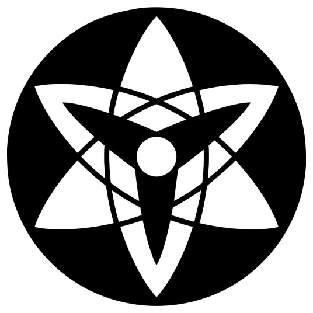

In [7]:
image = image/255
watermark = watermark/255
plt.imshow(watermark,cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

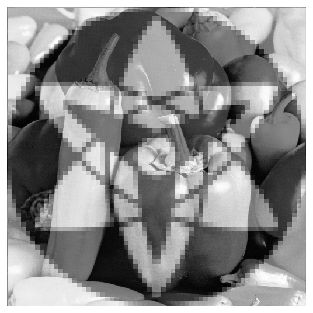

In [8]:
# adding watermark
coeffs2_im = pywt.wavedec2(image,'haar', level = 3)
coeffs2_w = pywt.wavedec2(watermark,'haar', level = 3)
a=0.7
coeffs2_im[0] += a*coeffs2_w[0]
encoded = pywt.waverec2(coeffs2_im, 'haar')
plt.imshow(encoded, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

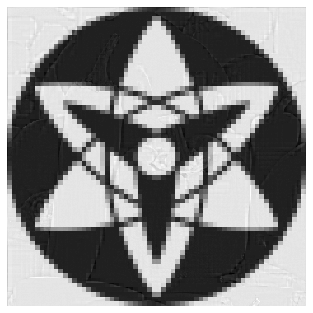

In [9]:
# extracting watermark
coeffs2_im = pywt.wavedec2(image,'haar', level = 3)
coeffs2_w = pywt.wavedec2(encoded,'haar', level = 3)
a=0.2
coeffs2_w[0] = (coeffs2_w[0] - coeffs2_im[0])/a
decoded = pywt.waverec2(coeffs2_w, 'haar')
plt.imshow(decoded, cmap='gray')
plt.grid(False)
plt.xticks([])
plt.yticks([])